### **Semana 4: Actividad 1** - *Reducción de Dimensionalidad*

**Iván Lee Cancino - A01793491**

### **TC4029 - Ciencia y Analítica de Datos**

**Prof. Jobish Vallikavungal**

**Prof. Julio César Galindo López**

*11 - Octubre - 2022*

---


---

## **Parte 1:** Ejercicio guiado 

### **PCA** (Principal Component Analysis)
PCA es el método más utilizado para reducción de dimensionalidad. Se utiliza para reducir el número de atributos o variables de un conjunto de datos para facilitar el análisis. PCA considera como "información" la varianza de cada atributo y busca reducir duplicidad de información en términos de variables correlacionadas.  

In [2]:
#importamos librerías
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

> **NOTA:** La base de datos correspondiente a la actividad anterior de limpieza de datos se guardó en el archivo *'clients_clean.csv'*   

In [3]:
#Creamos dataframe del archivo csv
df = pd.read_csv('clients_clean.csv', index_col=0)
df 

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,1.0,1.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,1.0,1.0,1.0,1.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,1.0,1.0,1.0,1.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,1.0,-1.0,1.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1.0,3.0,1.0,39.0,1.0,1.0,1.0,1.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29996,29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29997,29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29998,29999,80000,1.0,3.0,1.0,41.0,1.0,-1.0,1.0,1.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


> La descripción de la base de datos la encontramos aqui:
https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/dataset_info.txt

### **Paso 1:** Determine el número mínimo de componentes principales que representan la mayor parte de la variación en sus datos

- Utilice la proporción acumulada de la varianza que explican los componentes para determinar la cantidad de varianza que explican los componentes principales.

Recordamos que **PCA** funciona solo con variables numericas, por lo que descartamos las columnas con datos categóricos. 

In [4]:
# Creamos una copia del dataframe, eliminando variables categoricas
ndf = df.copy()
ndf.drop(['ID', 'X2', 'X3', 'X4', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'Y'],
          axis=1, inplace=True)
ndf 

,X1,X5,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,20000,24.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000,26.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000,34.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000,37.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000,57.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,39.0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29996,150000,43.0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29997,30000,37.0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0
29998,80000,41.0,1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0


Ahora que tenemos solo las columnas para nuestro análisis, procedemos a revisar la correlación entre variables. 

Para visualizar mejor los datos, creamos un mapa de calor en donde los valores en color mas claro (cercanos a 1) indican mayor correlación entre pares de variables y los colores mas oscuros (cercanos a 0) indican poca o ninguna correlación.  

<AxesSubplot:>

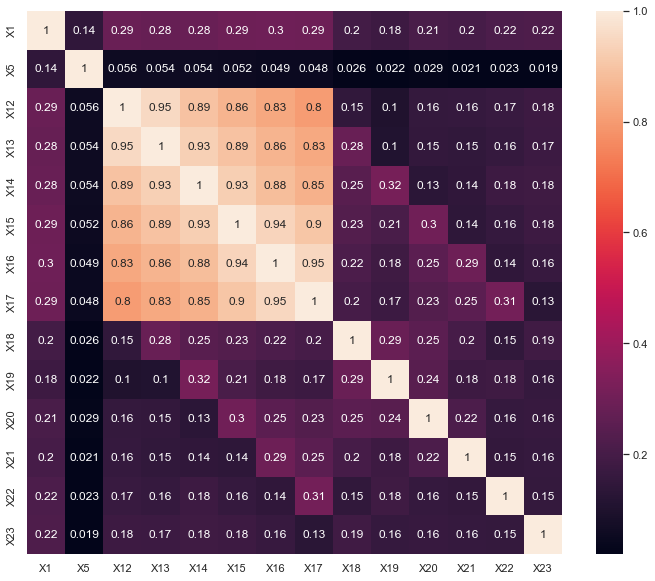

In [7]:
# Creamos matríz de correlación con mapa de calor
sns.set(rc={'figure.figsize':(12,10)})
corr_mat = ndf.corr(method='pearson')
sns.heatmap(corr_mat, annot=True)

**De la matríz observamos que:** 

De las variables X12 a X17 tienenen mayor correlación entre sí, lo cual tiene lógica ya que el monto de deuda es similar de un mes a otro.
* *X12 a X17 = monto de deuda de Septiembre a Abril*

La variable X5 es la que menos correlación tiene con el resto de las variables, de lo cual podemos inferir que en este caso la edad del cliente no tiene tanta influencia en su comportamiento financiero. 
* *X5 = es la edad del cliente*   

In [8]:
# importamos modulos de scikit-learn
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA

Antes de iniciar con el PCA es necesario estandarizar los datos, de lo contrario se le asignará mayor importancia a las variables cuya escala de medición sea mayor, lo cual no es necesariamente cierto.

Usamos *StandardScaler* para estandarizar los datos. A esta técnica se le conoce como **Normalización de puntuación Z** 

Este proceso estandariza cada valor de manera que:
- La media de todos los valores = 0 
- La desviación estándar = 1

Cada puntuación z nos dice a cuántas desviaciones estándar se encuentra un valor individual de la media

Formula:
$$ x_{new} = \cfrac{x_{old} - \mu}{\sigma}$$ 

In [9]:
# Usamos StandardScaler para estandarizar los datos
scaler = StandardScaler()
ndf_scaled = pd.DataFrame(scaler.fit_transform(ndf),
                          columns = ndf.columns)

ndf_scaled.round(4)

,X1,X5,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,-1.1368,-1.2459,-0.6435,-0.6485,-0.6694,-0.6742,-0.6648,-0.6562,-0.3419,-0.2271,-0.2968,-0.3081,-0.3141,-0.2934
1,-0.3661,-1.0289,-0.6602,-0.6679,-0.6406,-0.6233,-0.6079,-0.6013,-0.3419,-0.2136,-0.2400,-0.2442,-0.3141,-0.1809
2,-0.5973,-0.1610,-0.2994,-0.4950,-0.4837,-0.4513,-0.4187,-0.3947,-0.2502,-0.1919,-0.2400,-0.2442,-0.2487,-0.0122
3,-0.9056,0.1645,-0.0582,-0.0141,0.0319,-0.2337,-0.1881,-0.1593,-0.2211,-0.1694,-0.2286,-0.2379,-0.2442,-0.2371
4,-0.9056,2.3344,-0.5795,-0.6124,-0.1623,-0.3484,-0.3496,-0.3344,-0.2211,1.3349,0.2712,0.2664,-0.2690,-0.2552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29992,0.4047,0.3815,1.8705,2.0183,2.3271,0.6948,-0.1506,-0.3874,0.1713,0.6110,-0.0126,-0.1136,0.0131,-0.2371
29993,-0.1348,0.8155,-0.6738,-0.6665,-0.6288,-0.5345,-0.5794,-0.6562,-0.2310,-0.1040,0.2143,-0.2998,-0.3141,-0.2934
29994,-1.0597,0.1645,-0.6482,-0.6450,-0.6395,-0.3494,-0.3260,-0.3306,-0.3419,-0.2570,0.9528,-0.0400,-0.1832,-0.1190
29995,-0.6744,0.5985,-0.6743,0.4097,0.4217,0.1468,-0.4696,0.1669,4.8445,-0.1091,-0.2299,-0.1851,3.1524,-0.1919


In [10]:
# Calculamos la media y desviación est. de cada variable
ndf_scaled_dict = {'mean':ndf_scaled[ndf_scaled.columns].mean().round(4), 
                   'std':ndf_scaled[ndf_scaled.columns].std().round(4)} 

# Verificamos resultado de la estandarización
pd.DataFrame(ndf_scaled_dict).transpose()

,X1,X5,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
mean,-0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


* Observamos ahora que la escala de todas las variables es la misma, la *media* = 0 y *desviación est.* = 1 

**Procedemmos con el PCA**

In [11]:
# Realizamos PCA
pcs = PCA()
p_comp = pcs.fit_transform(ndf_scaled)

# Creamos una tabla con los datos de los componentes principales
pcsSummary_df = pd.DataFrame({'Desviacion estandar': np.sqrt(pcs.explained_variance_),
                              'Proporcion de varianza': pcs.explained_variance_ratio_,
                              'Proporcion acumulada': np.cumsum(pcs.explained_variance_ratio_)
                             })
pcsSummary_df = pcsSummary_df.transpose()

# Cambiamos el nombre de las columnas
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4) 

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
Desviacion estandar,2.4350,1.3083,1.0223,0.9619,0.9383,0.9333,0.8820,0.8521,0.8412,0.5139,0.2680,0.2022,0.1605,0.1537
Proporcion de varianza,0.4235,0.1223,0.0746,0.0661,0.0629,0.0622,0.0556,0.0519,0.0505,0.0189,0.0051,0.0029,0.0018,0.0017
Proporcion acumulada,0.4235,0.5458,0.6204,0.6865,0.7494,0.8116,0.8672,0.9190,0.9696,0.9884,0.9936,0.9965,0.9983,1.0000


**Como podemos observar en la *Proporción acumulada*, los primeros 7 componentes explican poco mas del 86% de la varianza asociada al total de las 14 variables.** 

In [12]:
print('La varianza acumulada de los primeros 7 componentes es:',
         ((pcsSummary_df.iloc[2][6])*100).round(2),'%','del total')

La varianza acumulada de los primeros 7 componentes es: 86.72 % del total


**Scree Plot**
- Con esta grafica visualizamos rápidamente la cantidad de varianza "explicada" por cada componente y el acumulado de la varianza.

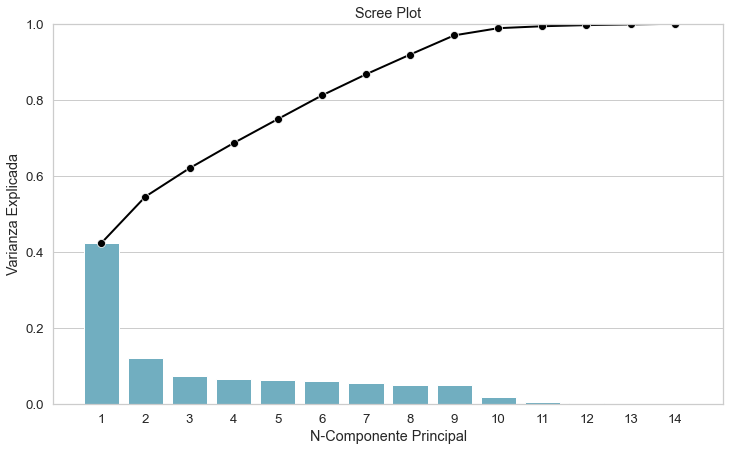

In [29]:
PC_components = np.arange(pcs.n_components_) + 1

sns.set(style = 'whitegrid', font_scale = 1.2)

fig, ax = plt.subplots(figsize=(12, 7))

sns.barplot(x = PC_components, y = pcs.explained_variance_ratio_, 
             color = 'c')

sns.lineplot(x = PC_components-1, 
             y = np.cumsum(pcs.explained_variance_ratio_), 
             linestyle = '-', linewidth = 2, 
             marker = 'o', markersize = 8,
             color = 'black')

plt.title('Scree Plot')
plt.xlabel('N-Componente Principal')
plt.ylabel('Varianza Explicada')
plt.ylim(0, 1)
plt.show()

Comprobamos que el total de varianza de las variables originales(estandarizadas) es igual al total de varianza de los componentes principales.

Esto nos indica que si consideramos los 14 PCs no habría pérdida de información.

In [14]:
# Creamos dataframe con la información de los PC's
pc_df = pd.DataFrame(p_comp)
print('Varianza total de variables originales =', ndf_scaled.var().sum().round(4))
print('Varianza total componentes principales =', pc_df.var().sum().round(4)) 

Varianza total de variables originales = 14.0005
Varianza total componentes principales = 14.0005


### Conclusión Paso 1:
De acuerdo a la varianza acumulada de los componentes principales y estableciendo un criterio mínimo del 85%, determinamos que:
> Los primeros 7 componentes principales cumplen con el criterio, explicando el **86.72%** de la varianza. 

_ _ _ 

### **Paso 2:** Interprete cada componente principal en términos de las variables originales

* Examine la magnitud y la dirección de los coeficientes de las variables originales.

   - Nota: Cuanto mayor sea el valor absoluto del coeficiente, más importante será la variable correspondiente en el cálculo del componente.

**Es importante mencionar que cada componente principal representa un vector con la combinación de las contribuciones de varianza de cada variable original.**
- El PC1 captura la mayor cantidad de varianza (como se observa en la scree plot), sucesivamente el PC2 captura la mayor varianza posible bajo la condición de que este es ortogonal al PC1, es decir que no esta correlacionado con PC1. Los demás PCs siguen este mismo esquema.  

- Para cada componente principal, PCA encuentra un vector unitario centrado en el orígen apuntando en dirección del componente principal correspondiente.

Recordemos que el vector unitario representa la dirección (positivo/negativo), y en nuestro caso es la dirección del PC en la que la varianza es la máxima. Los coeficientes (valores absolutos) de cada variable original son los “eigenvalues” que nos dicen que tanto contribuyen al cálculo del vector o PC.       

In [15]:
# Con .components obtenemos los coeficientes o pesos de cada PC
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(),
                                 columns = pcsSummary_df.columns,
                                 index = ndf.columns)
                                 
# Imprimimos los primeros 7 PC                                
pcsComponents_df.iloc[:,:7]  

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
X1,0.165529,0.300659,-0.378411,-0.199351,-0.024801,-0.083421,0.111081
X5,0.032735,0.071968,-0.870445,0.335519,0.028272,0.074488,-0.078180
X12,0.372373,-0.191242,-0.032497,-0.058676,-0.035699,-0.045631,0.006431
X13,0.382983,-0.175872,-0.001265,0.010321,-0.078062,-0.035977,-0.032090
X14,0.388063,-0.127835,0.034723,0.063190,-0.124189,0.083862,-0.115615
X15,0.391463,-0.120511,0.033680,0.074011,-0.022011,0.007680,0.122380
X16,0.388207,-0.107126,0.033011,0.036896,0.120897,-0.080315,-0.007417
X17,0.380657,-0.092992,0.016899,-0.077382,0.143620,0.083835,0.008771
X18,0.135578,0.382612,0.172548,0.362346,-0.233260,0.008250,-0.202511
X19,0.117018,0.408543,0.199762,0.347381,-0.204059,0.384178,-0.276606


Determinamos la variable que mas contribuye y la de menor contibución al cálculo de cada PC:

In [16]:
# Usamos abs() para el valor absoluto y
# idxmax para determinar el valor maximo por fila
# idxmin para determinar el valor mínimo por fila
orig_var_maxmin = {'variable_mayor':pcsComponents_df.iloc[:,:7].abs().idxmax(),
                   'variable_menor':pcsComponents_df.iloc[:,:7].abs().idxmin()} 
pd.DataFrame(orig_var_maxmin).transpose()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
variable_mayor,X15,X19,X5,X22,X21,X22,X20
variable_menor,X5,X5,X13,X13,X15,X15,X12


De igual manera podemos determinar los pesos de las variables mas importantes por cada PC:

In [18]:
# seleccionamos los 4 coeficientes mas importantes del PC 
pd.DataFrame(pcsComponents_df.PC1.abs().nlargest(4)).transpose()   

,X15,X16,X14,X13
PC1,0.391463,0.388207,0.388063,0.382983


In [19]:
pd.DataFrame(pcsComponents_df.PC2.abs().nlargest(4)).transpose() 

,X19,X20,X18,X21
PC2,0.408543,0.392588,0.382612,0.349139


In [20]:
pd.DataFrame(pcsComponents_df.PC3.abs().nlargest(4)).transpose() 

,X5,X1,X19,X18
PC3,0.870445,0.378411,0.199762,0.172548


In [21]:
pd.DataFrame(pcsComponents_df.PC4.abs().nlargest(4)).transpose() 

,X22,X23,X18,X19
PC4,0.610296,0.366852,0.362346,0.347381


In [22]:
pd.DataFrame(pcsComponents_df.PC5.abs().nlargest(4)).transpose() 

,X21,X23,X20,X18
PC5,0.642874,0.595161,0.255058,0.23326


In [23]:
pd.DataFrame(pcsComponents_df.PC6.abs().nlargest(4)).transpose() 

,X22,X23,X21,X19
PC6,0.623828,0.500295,0.413598,0.384178


In [24]:
pd.DataFrame(pcsComponents_df.PC7.abs().nlargest(4)).transpose()  

,X20,X21,X19,X18
PC7,0.785604,0.46525,0.276606,0.202511


### Conclusión Paso 2:

* De este análisis podemos determinar que para el PC1 las variables asociadas al monto de deuda son las que más contribuyen. Es decir, el PC1 esta midiendo principalmente el estado mensual de deuda de los clientes.

* En general para los demás PCs las variables asociadas al monto pagado mensual son las que tienen mayor contribución. Estos PCs miden principalmente los montos pagados al mes anterior. 

_ _ _ 

### **Paso 3:** Identifique valores atípicos
- Realice alguna gráfica de valores atípicos o boxplot para identificar los valores atípicos. Cualquier punto que esté más alejado de la línea de referencia es un valor atípico.

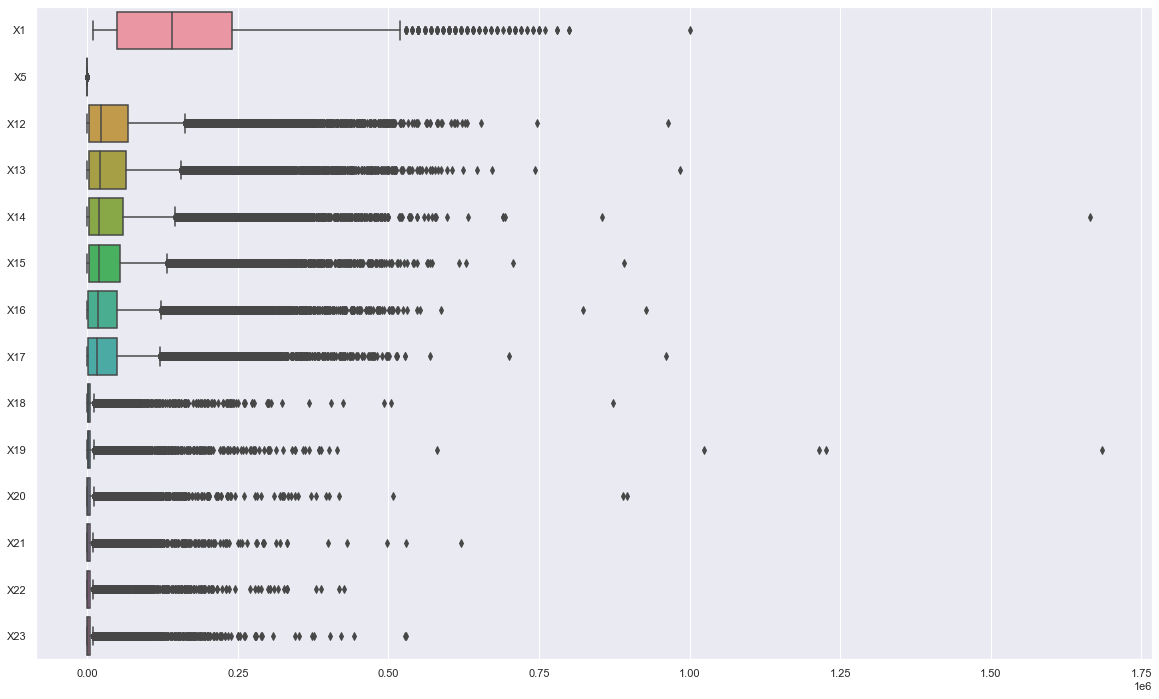

In [28]:
# Creamos gráfica box-and-whisker
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(20,12)})
sns.boxplot(data=ndf, orient = 'h')
plt.show()

### Conclusión Paso 3:
* De la gráfica de caja y bigotes observamos una gran cantidad de valores atípicos en casi todas las variables, a excepción de X5 que por lógica no debería tener outliers ya que representa la edad en años de los clientes. 

* Es importante señalar que el PCA es suceptible a *"outliers"* por lo que es necesario considerar una estrategia de transformación de los datos que tome en cuenta estos valores antes de aplicar el PCA. Tal vez una opción sea realizar una segmentación de los clientes para reducir la disperción de los datos, y de ser posible involucrar la opinión de los especialistas del dominio (domain expert) para definir una estrategia válida.  
_ _ _

## **Parte 2:** Responde las siguientes preguntas en una celda de texto en Jupyter Notebook 

**1. ¿Cuál es el número de componentes mínimo y por qué?**

La idea del PCA es de reducir la cantidad de variables perdiendo la menor cantidad posible de información o varianza del conjunto de datos. Para este ejercicio establecimos como aceptable un criterio de porcentaje mínimo de varianza del 85%. Después del PCA encontramos que los primeros 7 componentes principales cumplen con el criterio.  

**2. ¿Cuál es la variación de los datos que representan esos componentes?**

De acuerdo con el cálculo del acumulado de varianza para los primeros 7 componentes principales, la variación de los datos es de 86.72% del total. 

**3. ¿Cuál es la pérdida de información después de realizar PCA?**

De los 14 componentes principales, se descartaron los últimos 7 que representan un 13.28% de la información o varianza total. 

**4. De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales?**

Para determinar qué variables tienen mayor o menor importancia en los componentes principales, observamos los valores absolutos de los coeficientes o pesos de cada variable en el PC. Cuanto mayor sea el valor del coeficiente de la variable, este tendrá mayor importancia para el componente principal correspondiente.

* En la siguiente tabla observamos la variable original con mayor y menor importancia para cada uno de los primeros 7 componentes principales:

In [26]:
orig_var_maxmin = {'variable_mayor':pcsComponents_df.iloc[:,:7].abs().idxmax(),
                   'variable_menor':pcsComponents_df.iloc[:,:7].abs().idxmin()} 
pd.DataFrame(orig_var_maxmin).transpose() 

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
variable_mayor,X15,X19,X5,X22,X21,X22,X20
variable_menor,X5,X5,X13,X13,X15,X15,X12


**5. ¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning?**

Es recomendado realizar un PCA cuando tenemos un conjunto de datos con muchas dimensiones o variables que hacen muy complicado el análisis. PCA permite reducir variables correlacionadas que duplican información, haciendo que el análisis sea más manejable. Muchos problemas de machine learning involucran cientos de variables, lo cual hace muy lento el entrenamiento del modelo, entre los beneficios de realizar un PCA están: acelerar el algoritmo de entrenamiento, remover “ruido” de los datos y eliminar variables redundantes, todo esto hace que el modelo de machine learning se comporte mejor. Reducir dimensionalidad ayuda también a visualizar mejor los datos y comprender mejor los atributos más importantes.

_ _ _
_ _ _